In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from SubGraphMatcher import SubGraphMatcher

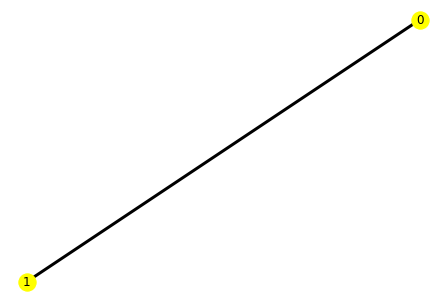

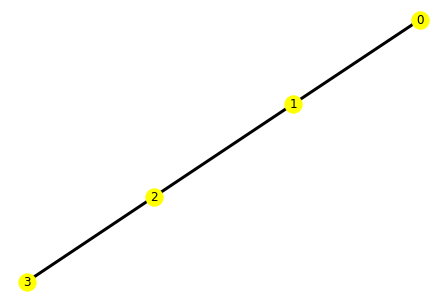

In [2]:
def draw_graph(G):
    options = {
        'node_color': 'yellow',
        'node_size': 300,
        'width': 3,
        'with_labels': True
    }
    nx.draw(G, **options)
    plt.show()

G_t = nx.path_graph(4)
G_q = nx.path_graph(2)

draw_graph(G_q)
draw_graph(G_t)

In [3]:
SGM = SubGraphMatcher(G_q, G_t)
print(SGM.is_subgraph_match())

True


In [4]:
G_q.add_node(3)
SGM = SubGraphMatcher(G_q, G_t)
print(SGM.is_subgraph_match())

AssertionError: 